In [ ]:
pip install torch torchvision

In [ ]:
pip install tensorboard

In [2]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import random
import torch.nn as nn
import torch.optim as optim
import torchvision
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from torch.utils.tensorboard import SummaryWriter



In [3]:
class Places2Dataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.categories = []
        self.images = []
        self.labels = []

        for root, dirs, files in os.walk(root_dir):
            if not dirs:
                category_name = os.path.basename(root)
                if category_name not in self.categories:
                    self.categories.append(category_name)
                category_idx = self.categories.index(category_name)
                for image_file in files:
                    if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                        self.images.append(os.path.join(root, image_file))
                        self.labels.append(category_idx)
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image_path = self.images[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


In [4]:
# -*- coding: utf-8 -*-
"""Applied Machine Learning Code

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1AztY1MO8FEivPIpbahU5wqk7FBGfPTLM
"""


# Transformations to apply on the images
#Resize images to 224x224 pixels:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    #Data augmentation techniques:
    transforms.RandomHorizontalFlip(),
    #transforms.RandomVerticalFlip(),
    transforms.RandomAffine(degrees=20, translate=(0.2, 0.2), scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [5]:
# !unzip -o "/content/drive/MyDrive/Places2_simp.zip" -d "/content/"
# !unzip -o "/content/drive/MyDrive/testset.zip" -d "/content/"


In [6]:
# Define the dataset and dataloader, change the root_dir to the path of the dataset
dataset = Places2Dataset(root_dir='/user/HS401/sc02978/Downloads/AdvancedMachineLearning/Places2_simp', transform=transform)

# this is the dataset you collected   #not required Sumesh
new_dataset = Places2Dataset(root_dir='/user/HS401/sc02978/Downloads/AdvancedMachineLearning/testset/testset', transform=transform)
# /user/HS401/sc02978/Downloads/AdvancedMachineLearning

# Print the number of images in both datasets
print("Number of images in the dataset: {}".format(len(dataset)))
print("Number of images in the new dataset: {}".format(len(new_dataset)))

Number of images in the dataset: 40000
Number of images in the new dataset: 29


In [7]:
# Define the size of train and test sets
#Split the dataset into training (80%) and validation (20%) sets:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

In [8]:
batch_size=64

In [9]:
# Randomly split the dataset into train and test sets
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create dataloaders for training and testing sets
# you can fine tune the batch_size
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create dataloader for new dataset
new_dataloader = DataLoader(new_dataset, batch_size, shuffle=False)

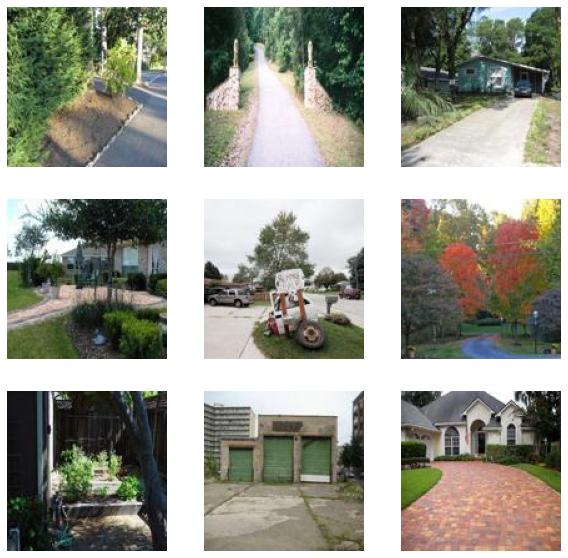

In [10]:
import random
from random import shuffle
import matplotlib.pyplot as plt
import numpy as np
# X_v = Places2Dataset(root_dir='/content/drive/MyDrive/Colab Notebooks/0.1 Applied machine learning/Project/Places2_simp')
# Define the dataset and dataloader, change the root_dir to the path of the dataset
X_v= Places2Dataset(root_dir='/user/HS401/sc02978/Downloads/AdvancedMachineLearning/Places2_simp')
# new_dataset = Places2Dataset(root_dir='/user/HS401/sc02978/Downloads/AdvancedMachineLearning/Places2_simp', transform=transform)
# this is the dataset you collected   #not required Sumesh
# new_dataset = Places2Dataset(root_dir='/user/HS401/sc02978/Downloads/AdvancedMachineLearning/testset', transform=transform)
# /user/HS401/sc02978/Downloads/AdvancedMachineLearning


fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
  for j, ax in enumerate(axes.flat):
    ax.imshow(X_v[i][0])      # Assuming X_v[i][0] contains the image data
    ax.axis('off')  # Hide axes
    i=i-1
    j=j-1
plt.show()

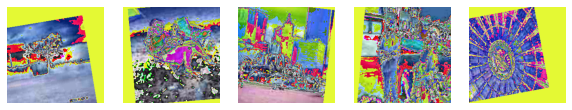

In [11]:
##Sumesh

# import torch
# import torchvision.transforms as transforms
# import matplotlib.pyplot as plt

# # Assuming you have a dataset and have already loaded it
# # Replace 'YourDatasetClass' with the actual class of your dataset
# # Replace 'train_size' and 'test_size' with your desired sizes
# # Replace 'transform' with appropriate transformations for your dataset
# dataset = YourDatasetClass(...)
# train_size = ...
# test_size = ...
# train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Define a function to display images
def show_images(dataset):
    plt.figure(figsize=(10, 5))
    for i in range(5):  # Display first 5 images
        image, _ = dataset[i]  # Assuming your dataset returns (image, label)
        plt.subplot(1, 5, i + 1)
        plt.imshow(transforms.ToPILImage()(image))  # Convert tensor to PILImage for display
        # plt.imshow(image)
        plt.axis('off')
    plt.show()

# Display images from the training dataset
show_images(train_dataset)

# Display images from the testing dataset
# show_images(test_dataset)


In [12]:
train_dataset

In [13]:
# note: The shuffle argument is set to True for the training dataloader,
# which randomly shuffles the training images at the beginning of each epoch.
# The shuffle argument is set to False for the testing dataloader
# to preserve the order of the testing images.

"""higher learning rate for the early layers of the model, since these layers are closer to the input data and may need to be updated more quickly to adapt to our dataset.A lower learning rate for the later layers of the model (layer3, layer4, and fc), since these layers are closer to the output of the model and may need to be updated more slowly to preserve the useful features learned by the pre-trained ResNet-34 model.


"""

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #since Cuda was available uncomented by sumesh

# Define the models, you can uncomment one of the following lines to use a different model
model = torchvision.models.resnet34()
#model = torchvision.models.resnet50()
#model = torchvision.models.resnet18()

In [14]:
print(device)


cuda:0


In [15]:
# Modify the last layer to match the number of categories in our dataset
num_classes = len(dataset.categories)
model.fc = nn.Linear(model.fc.in_features, num_classes)

learning_rates = [{'params': model.conv1.parameters(), 'lr': 0.001},
                  {'params': model.layer1.parameters(), 'lr': 0.001},
                  {'params': model.layer2.parameters(), 'lr': 0.0005},
                  {'params': model.layer3.parameters(), 'lr': 0.0005},
                  {'params': model.layer4.parameters(), 'lr': 0.0005},
                  {'params': model.fc.parameters(), 'lr': 0.001}]

# Specify different learning rates for different layers of the model
# learning_rates = [{'params': model.conv1.parameters(), 'lr': 0.005},#0.001} 0.005
#                   {'params': model.layer1.parameters(), 'lr': 0.005},#0.001}0.005
#                   {'params': model.layer2.paramers(), 'lr': 0.005},#0.001}0.005
#                   {'params': model.layer3.parameters(), et'lr': 0.0001},#0.0001},0.0001
#                   {'params': model.layer4.parameters(), 'lr': 0.0001},      #  0.0001}
#                   {'params': model.fc.parameters(), 'lr': 0.001}]     #0.0001}

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(learning_rates, lr=0.001, momentum=0.9)
optimizer = optim.Adam(learning_rates, lr=0.001,weight_decay=0.0001)# made by su

model = model.to(device)

In [16]:
# Create a SummaryWriter object to write the log files for TensorBoard
writer = SummaryWriter()

# Modify the last layer to match the number of categories in your dataset
num_classes = len(dataset.categories)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Specify different learning rates for different layers of the model
learning_rates = [{'params': model.conv1.parameters(), 'lr': 0.001},
                  {'params': model.layer1.parameters(), 'lr': 0.001},
                  {'params': model.layer2.parameters(), 'lr': 0.0005},
                  {'params': model.layer3.parameters(), 'lr': 0.0005},
                  {'params': model.layer4.parameters(), 'lr': 0.0005},
                  {'params': model.fc.parameters(), 'lr': 0.001}]

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(learning_rates, lr=0.001, momentum=0.9) # Original
# optimizer = optim.Adam(learning_rates, lr=0.001)# made by sumesh
optimizer = optim.Adam(learning_rates, lr=0.001,weight_decay=0.0001)# made by su
model = model.to(device)

# Define the number of epochs to train for
num_epochs = 50

# Create a SummaryWriter object to write the log files for TensorBoard
writer = SummaryWriter()

best_acc = 0
best_epoch = 0

In [17]:
# Train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.to(device))
        loss = criterion(outputs, labels.cuda()) #this is on nvidia
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:
            writer.add_scalar('training loss', running_loss / 10, epoch * len(train_dataloader) + i)
            print('Epoch #{} Batch #{} Loss: {:.4f}'.format(epoch + 1, i+1, running_loss / 10))
            running_loss = 0.0

    print('Finished Training Epoch #{}'.format(epoch + 1))

    print("Testing the model: ")
    # Set the model to evaluation mode
    model.eval()

    # Initialize counters for the top-1 and top-5 accuracies
    top1_correct = 0
    top5_correct = 0
    total = 0

    # Initialize the confusion matrix
    conf_matrix = torch.zeros(num_classes, num_classes)

    # Iterate over the validation set
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            _, top5_preds = outputs.topk(5, 1, largest=True, sorted=True)

            # Update the top-1 and top-5 accuracy counters
            top1_correct += torch.sum(preds == labels.data)
            for i in range(labels.size(0)):
                if labels[i] in top5_preds[i]:
                    top5_correct += 1

            # Update the confusion matrix
            conf_matrix += confusion_matrix(labels.cpu(), preds.cpu(), labels=list(range(num_classes)))
            total += labels.size(0)


    # Calculate the top-1 and top-5 accuracy
    top1_acc = float(top1_correct) / total * 100
    top5_acc = float(top5_correct) / total * 100

    writer.add_scalar('top1_accuracy', top1_acc, epoch)
    writer.add_scalar('top5_accuracy', top5_acc, epoch)

    print('Top-1 accuracy: {:.4f}'.format(top1_acc))
    print('Top-5 accuracy: {:.4f}'.format(top5_acc))

   # save the model if the top-1 accuracy is greater than the previous best accuracy and delete the previous model
    if top1_acc > best_acc:
        if os.path.exists('resnet50_bz32.pt'):
            os.remove('resnet50_bz32.pt')
        best_acc = top1_acc
        torch.save(model.state_dict(), 'resnet50_bz32.pt')

Epoch #1 Batch #10 Loss: 3.8924
Epoch #1 Batch #20 Loss: 3.7162
Epoch #1 Batch #30 Loss: 3.5887
Epoch #1 Batch #40 Loss: 3.6209
Epoch #1 Batch #50 Loss: 3.6156
Epoch #1 Batch #60 Loss: 3.5299
Epoch #1 Batch #70 Loss: 3.4847
Epoch #1 Batch #80 Loss: 3.4514
Epoch #1 Batch #90 Loss: 3.4578
Epoch #1 Batch #100 Loss: 3.4197
Epoch #1 Batch #110 Loss: 3.4376
Epoch #1 Batch #120 Loss: 3.3967
Epoch #1 Batch #130 Loss: 3.3701
Epoch #1 Batch #140 Loss: 3.3690
Epoch #1 Batch #150 Loss: 3.3178
Epoch #1 Batch #160 Loss: 3.3539
Epoch #1 Batch #170 Loss: 3.3142
Epoch #1 Batch #180 Loss: 3.3549
Epoch #1 Batch #190 Loss: 3.3232
Epoch #1 Batch #200 Loss: 3.3295
Epoch #1 Batch #210 Loss: 3.3355
Epoch #1 Batch #220 Loss: 3.2656
Epoch #1 Batch #230 Loss: 3.2658
Epoch #1 Batch #240 Loss: 3.2194
Epoch #1 Batch #250 Loss: 3.2181
Epoch #1 Batch #260 Loss: 3.2093
Epoch #1 Batch #270 Loss: 3.1378
Epoch #1 Batch #280 Loss: 3.2262
Epoch #1 Batch #290 Loss: 3.2777
Epoch #1 Batch #300 Loss: 3.2238
Epoch #1 Batch #310

In [18]:

# save_path = "/user/HS401/sc02978/Downloads/AdvancedMachineLearning/model.pth"

# # Save the trained model
# torch.save(model.state_dict(), save_path)


In [19]:

# Set the path to your Google Drive folder where you want to save the model
save_path = "/user/HS401/sc02978/Downloads/AdvancedMachineLearning/model64.pth"

# Save the trained model
torch.save(model.state_dict(), save_path)

print("Model saved successfully.")

# load the trained model
model.load_state_dict(torch.load('/user/HS401/sc02978/Downloads/AdvancedMachineLearning/model64.pth'))

# Set the model to evaluation mode
model.eval()

# Initialize counters for the top-1 and top-5 accuracies
top1_correct = 0
top5_correct = 0
total = 0

# Initialize the confusion matrix
conf_matrix = torch.zeros(num_classes, num_classes)


Model saved successfully.


In [20]:
# Iterate over the validation set
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        _, top5_preds = outputs.topk(5, 1, largest=True, sorted=True)

        # Update the top-1 and top-5 accuracy counters
        top1_correct += torch.sum(preds == labels.data)
        for i in range(labels.size(0)):
            if labels[i] in top5_preds[i]:
                top5_correct += 1

        # Update the confusion matrix
        conf_matrix += confusion_matrix(labels.cpu(), preds.cpu(), labels=list(range(num_classes)))

        total += labels.size(0)


In [21]:
# Calculate the top-1 and top-5 accuracy
top1_acc = float(top1_correct) / total * 100
top5_acc = float(top5_correct) / total * 100

print('Top-1 accuracy: {:.4f}'.format(top1_acc))
print('Top-5 accuracy: {:.4f}'.format(top5_acc))

Top-1 accuracy: 42.8375
Top-5 accuracy: 74.9250


In [22]:
plt.savefig("confusion_matrix.png")

<Figure size 432x288 with 0 Axes>

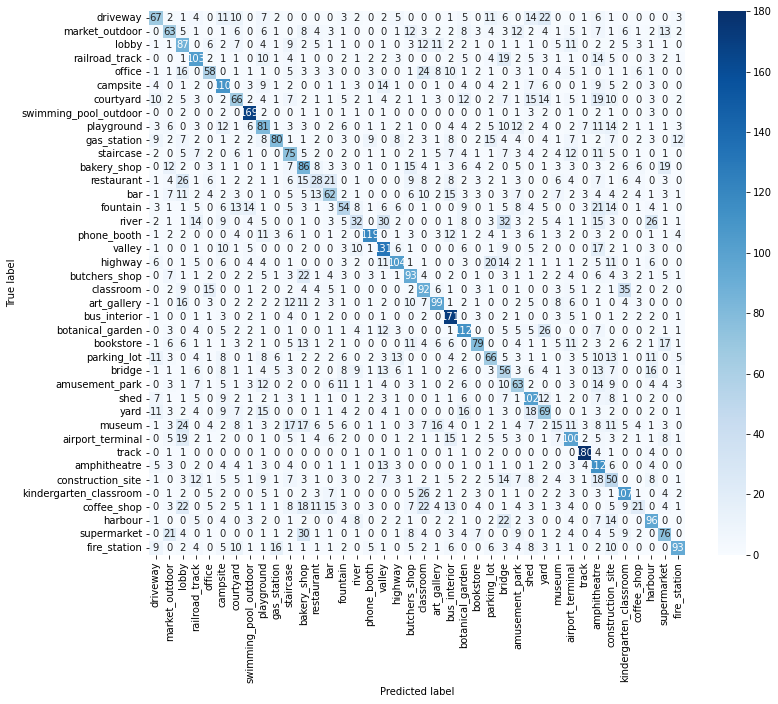

In [23]:
# Plot the confusion matrix
class_names = dataset.categories
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix.numpy(), xticklabels=class_names, yticklabels=class_names, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

In [24]:
from torchvision import datasets
# Define the batch size and the number of workers
# batch_size = 256
#batch_size = 32 Original
num_workers = 2

# Load the test dataset
test_dataset = datasets.ImageFolder('/user/HS401/sc02978/Downloads/AdvancedMachineLearning/testset', transform=transform)

# Create a dataloader for the test dataset
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

"""Testing on the new generated dataset"""

# Initialize counters for the top-1 and top-5 accuracies
top1_correct = 0
top5_correct = 0
total = 0

# Initialize the confusion matrix
conf_matrix = torch.zeros(num_classes, num_classes)

In [25]:
# Iterate over the test set
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        _, top5_preds = outputs.topk(5, 1, largest=True, sorted=True)

        # Update the top-1 and top-5 accuracy counters
        top1_correct += torch.sum(preds == labels.data)
        for i in range(labels.size(0)):
            if labels[i] in top5_preds[i]:
                top5_correct += 1

        # Update the confusion matrix
        conf_matrix += confusion_matrix(labels.cpu(), preds.cpu(), labels=list(range(num_classes)))

        total += labels.size(0)

Top-1 accuracy: 3.4483
Top-5 accuracy: 6.8966


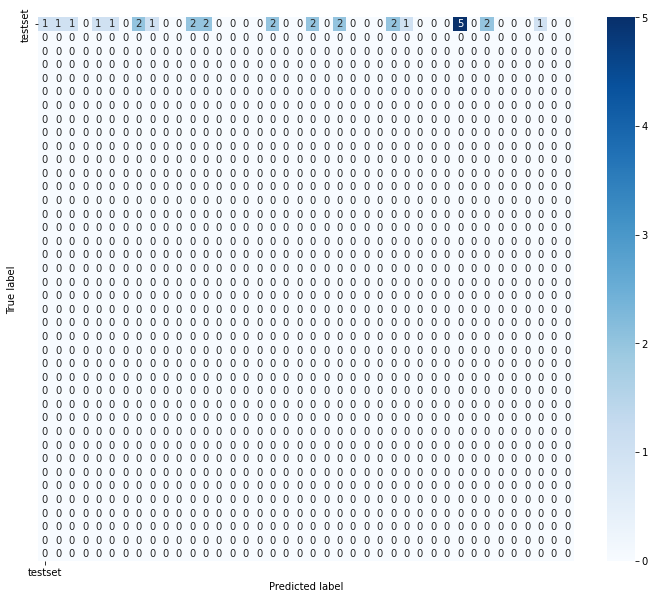

Top-1 accuracy: 3.4483
Top-5 accuracy: 6.8966


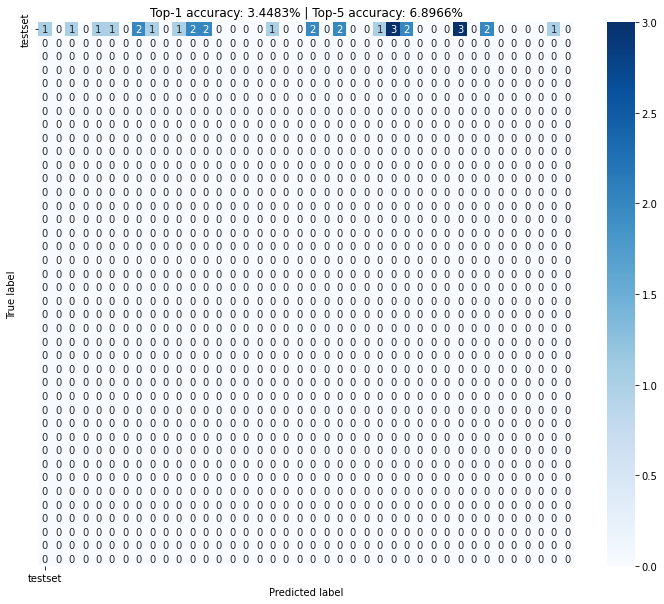

In [26]:


# Calculate the top-1 and top-5 accuracy
top1_acc = float(top1_correct) / total * 100
top5_acc = float(top5_correct) / total * 100

print('Top-1 accuracy: {:.4f}'.format(top1_acc))
print('Top-5 accuracy: {:.4f}'.format(top5_acc))

# Plot the confusion matrix
class_names = test_dataset.classes
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix.numpy(), xticklabels=class_names, yticklabels=class_names, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

"""this is a matrix that represents the true and predicted classes of the dataset"""

# Initialize counters for the top-1 and top-5 accuracies
top1_correct = 0
top5_correct = 0
total = 0

# Initialize the confusion matrix
conf_matrix = torch.zeros(num_classes, num_classes)

# Iterate over the test set
with torch.no_grad():
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        _, top5_preds = outputs.topk(5, 1, largest=True, sorted=True)

        # Update the top-1 and top-5 accuracy counters
        top1_correct += torch.sum(preds == labels.data)
        for i in range(labels.size(0)):
            if labels[i] in top5_preds[i]:
                top5_correct += 1

        # Update the confusion matrix
        conf_matrix += confusion_matrix(labels.cpu(), preds.cpu(), labels=list(range(num_classes)))

        total += labels.size(0)

# Calculate the top-1 and top-5 accuracy
top1_acc = float(top1_correct) / total * 100
top5_acc = float(top5_correct) / total * 100

print('Top-1 accuracy: {:.4f}'.format(top1_acc))
print('Top-5 accuracy: {:.4f}'.format(top5_acc))

# Plot the confusion matrix
class_names = test_dataset.classes
plt.figure(figsize=(12,10))
sns.heatmap(conf_matrix.numpy(), xticklabels=class_names, yticklabels=class_names, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title(f'Top-1 accuracy: {top1_acc:.4f}% | Top-5 accuracy: {top5_acc:.4f}%')
plt.show()